In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import numpy as np
import pylab as plt
from scipy.io import loadmat
from pca import pca
from gmm import *
import copy

In [3]:
# load synthetic data from MATLAB data file

variables = dict()
loadmat('synthData.mat', variables)

data = variables['data']

[[ 15.54829552 -11.33399064   1.00422313 ...,  10.41032137  -7.29143495
    3.61290958]
 [-11.33399064  33.90919411   1.54274998 ..., -22.81637688  21.22385352
   -3.25861388]
 [  1.00422313   1.54274998  10.6502491  ...,  -1.45056908   3.39139223
    1.63722614]
 ..., 
 [ 10.41032137 -22.81637688  -1.45056908 ...,  29.21685865 -19.443498
    2.61752316]
 [ -7.29143495  21.22385352   3.39139223 ..., -19.443498    30.72169768
    0.41208182]
 [  3.61290958  -3.25861388   1.63722614 ...,   2.61752316   0.41208182
   11.8951433 ]]


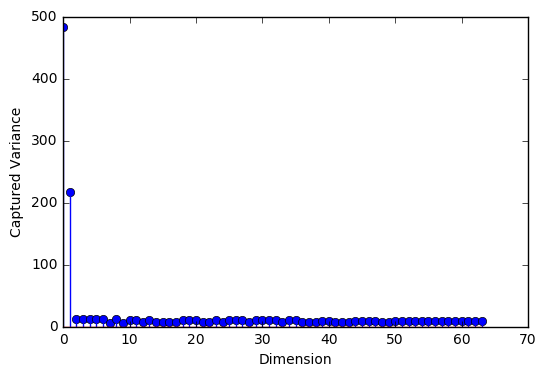

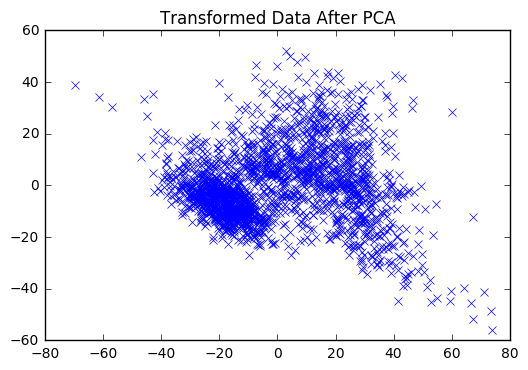

In [29]:
# run PCA

new_data, variances, eigenvectors = pca(data)

plt.figure()
plt.stem(variances.ravel())
plt.xlabel('Dimension')
plt.ylabel('Captured Variance')


plt.figure()
plt.plot(new_data[0,:], new_data[1,:], 'x')
plt.title('Transformed Data After PCA')

In [4]:
# truncate dimensions to just the first two
small_data = new_data[:2, :]

# split data for validation
d, n = small_data.shape

# use fraction of data for training

train_inds = np.random.rand(n) < 0.5

train_data = small_data[:, train_inds]
val_data = small_data[:, ~train_inds]

NameError: name 'new_data' is not defined

In [ ]:
# Run k-means

num_clusters = 5

means = np.random.randn(d, num_clusters)

symbols = ['xr', 'og', 'sb', '*m', '+c']

for iter in range(10):
    # compute memberships
    distance = np.sum(small_data ** 2, 0, keepdims=True) + np.sum(means ** 2, 0, keepdims=True).T - \
               2 * means.T.dot(small_data)
    
    memberships = np.argmin(distance, 0)
    
    plot_k_means(small_data, means, memberships)
    plt.title("K-Means Iteration %d" % iter)
    plt.show()
    
    # update means

    for i in range(num_clusters):
        if np.any(memberships == i):
            means[:, i] = np.mean(small_data[:, memberships == i], 1)


plot_k_means(small_data, means, memberships)
plt.title("K-Means Iteration 10")

In [ ]:
# Try Gaussian mixture models with different numbers of Gaussians

num_clusters = [1, 2, 3, 4, 5, 6, 8, 9, 10]

val_likelihood = []

all_means = []
all_sigmas = []
all_clust_probs = []

for k in range(len(num_clusters)):
    plt.figure()
    means, sigmas, clust_probs = gmm(train_data, num_clusters[k], plot='final')
    
    val_likelihood.append(gmm_ll(val_data, means, sigmas, clust_probs))

    all_means.append(means)
    all_sigmas.append(sigmas)
    all_clust_probs.append(clust_probs)

# plot likelihoods

plt.figure()

plt.plot(num_clusters, val_likelihood)
plt.xlabel('Number of Gaussians')
plt.ylabel('Log Likelihood of Val. Data')